# Q1: Bag of Words

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Importing the images and run the kmeans algorithm
	 importing: (31) inline_skate: . . . . 
	 importing: (64) joshua_tree: . . . . . . . 
	 importing: (86) kangaroo: . . . . . . . . . 
	 importing: (114) ketch: . . . . . . . . . . . . 
	 importing: (61) lamp: . . . . . . . 
	 importing: (81) laptop: . . . . . . . . . 
	 importing: (200) Leopards: . . . . . . . . . . . . . . . . . . . . 
	 importing: (78) llama: . . . . . . . . 
	 importing: (41) lobster: . . . . . 
	 importing: (66) lotus: . . . . . . . 
	 importing: (43) mandolin: . . . . . 
	 importing: (40) mayfly: . . . . 
	 importing: (87) menorah: . . . . . . . . . 
	 importing: (32) metronome: . . . . 
	 importing: (76) minaret: . . . . . . . . 
	 importing: (798) Motorbikes: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
	 

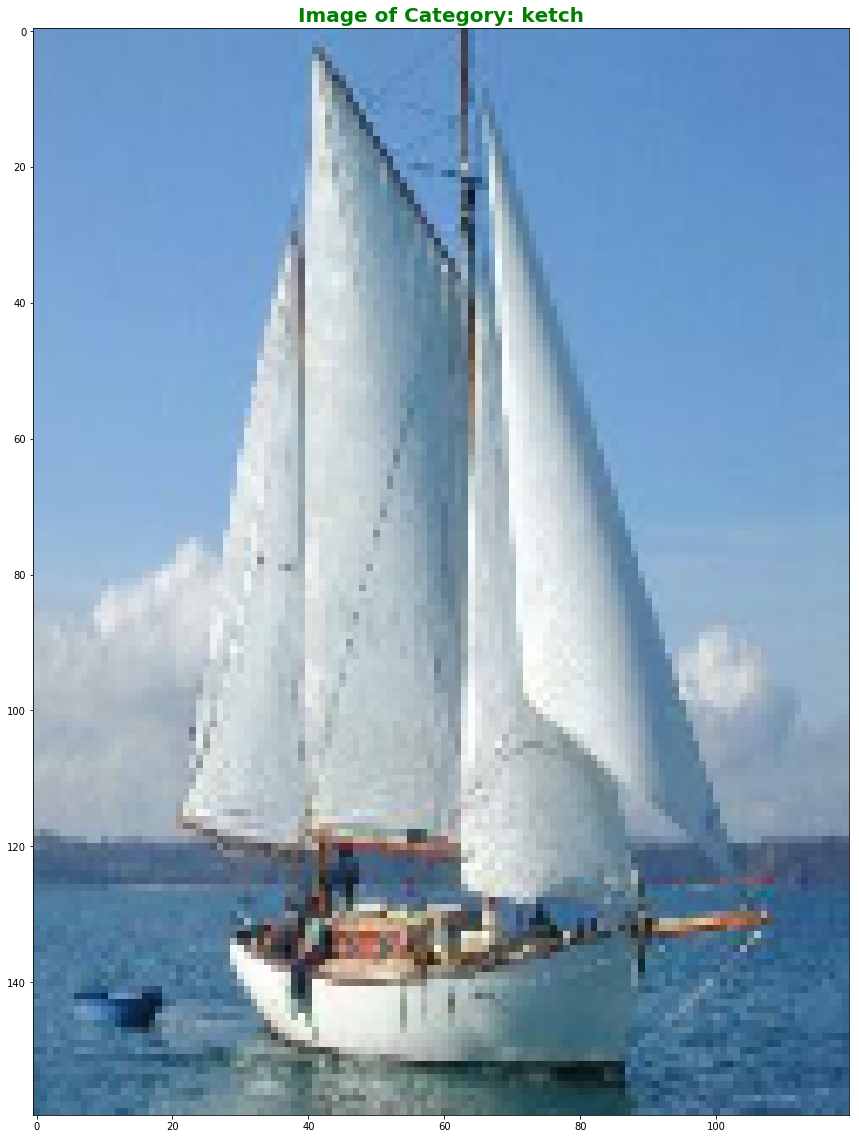

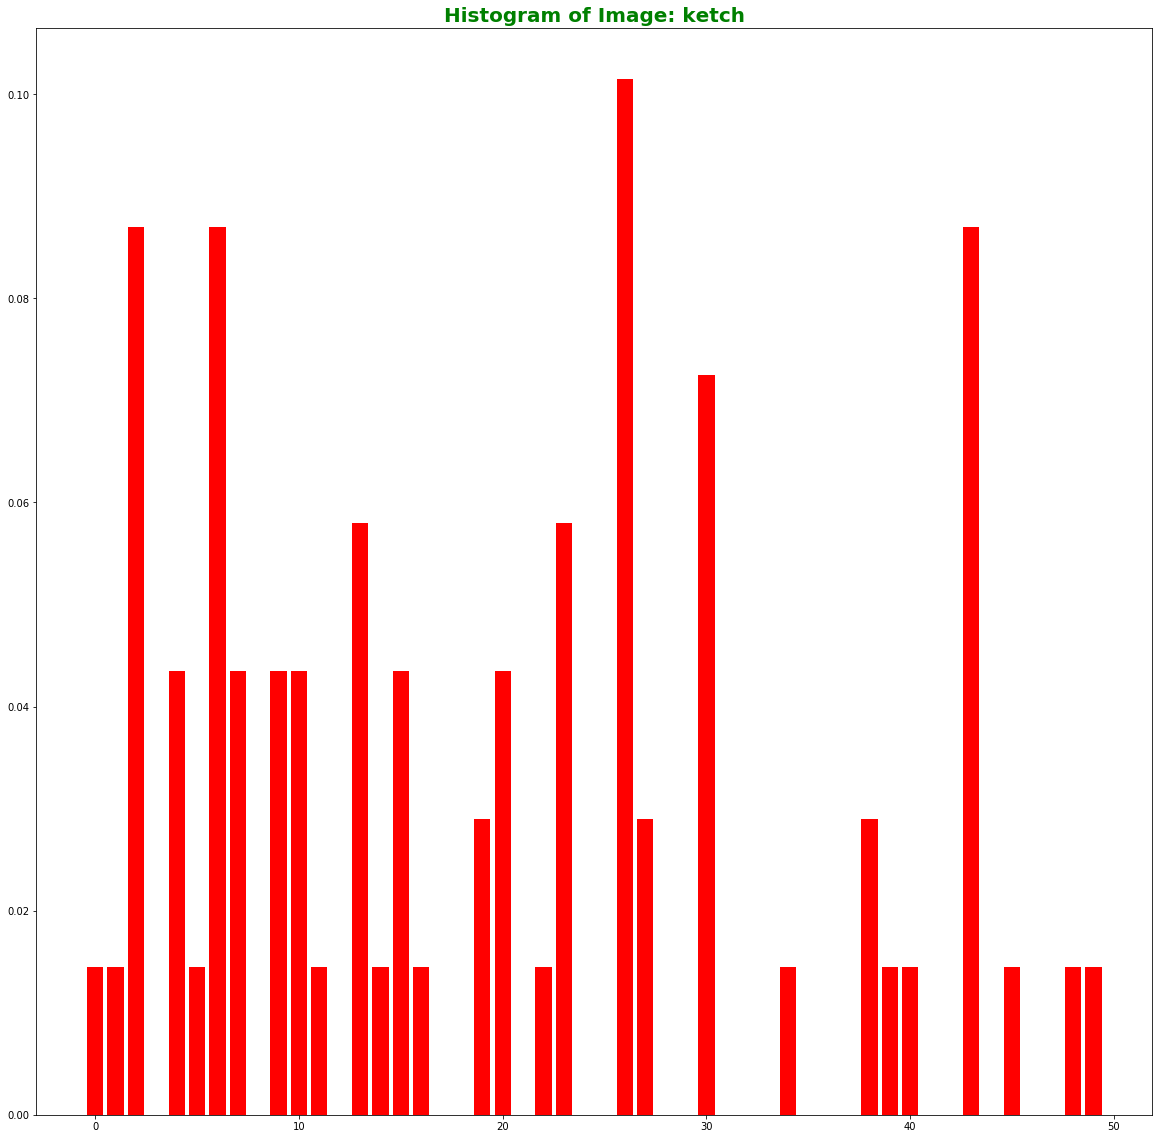

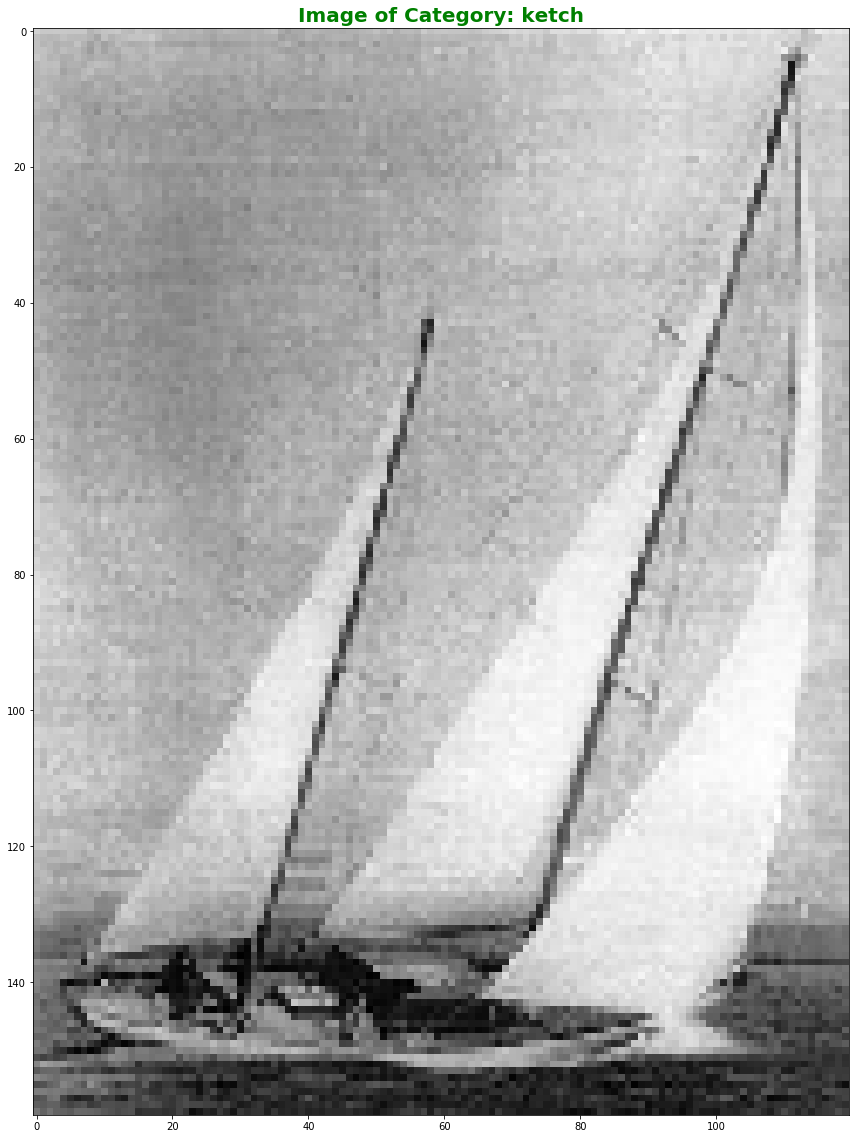

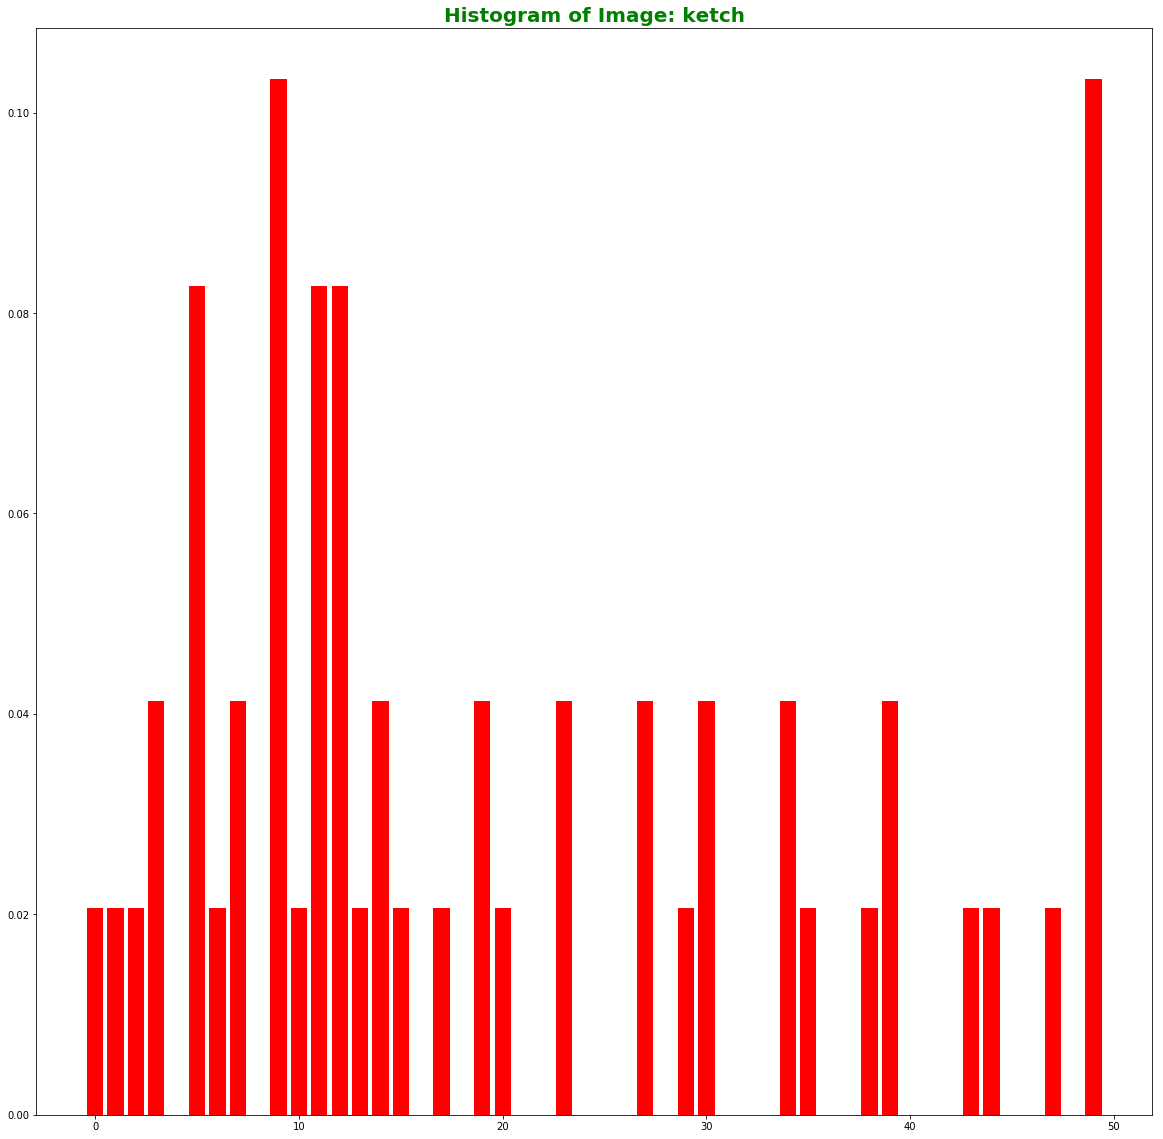

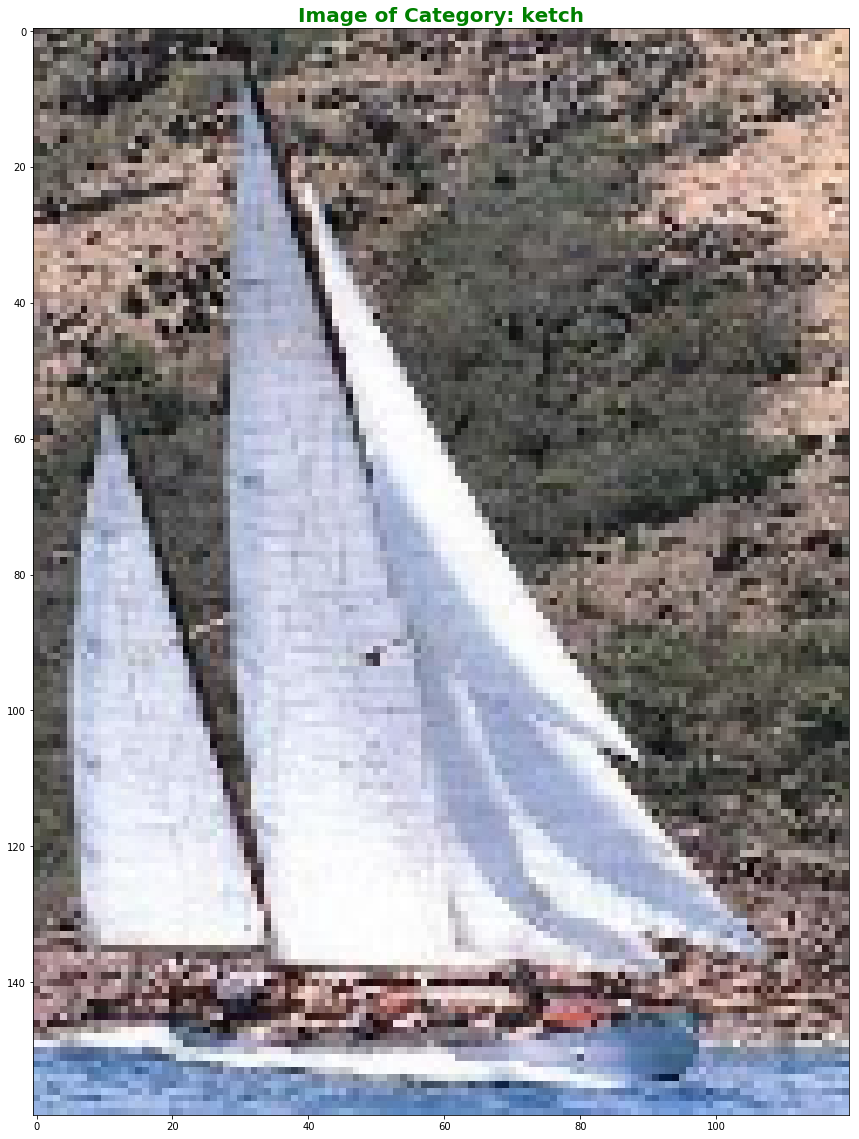

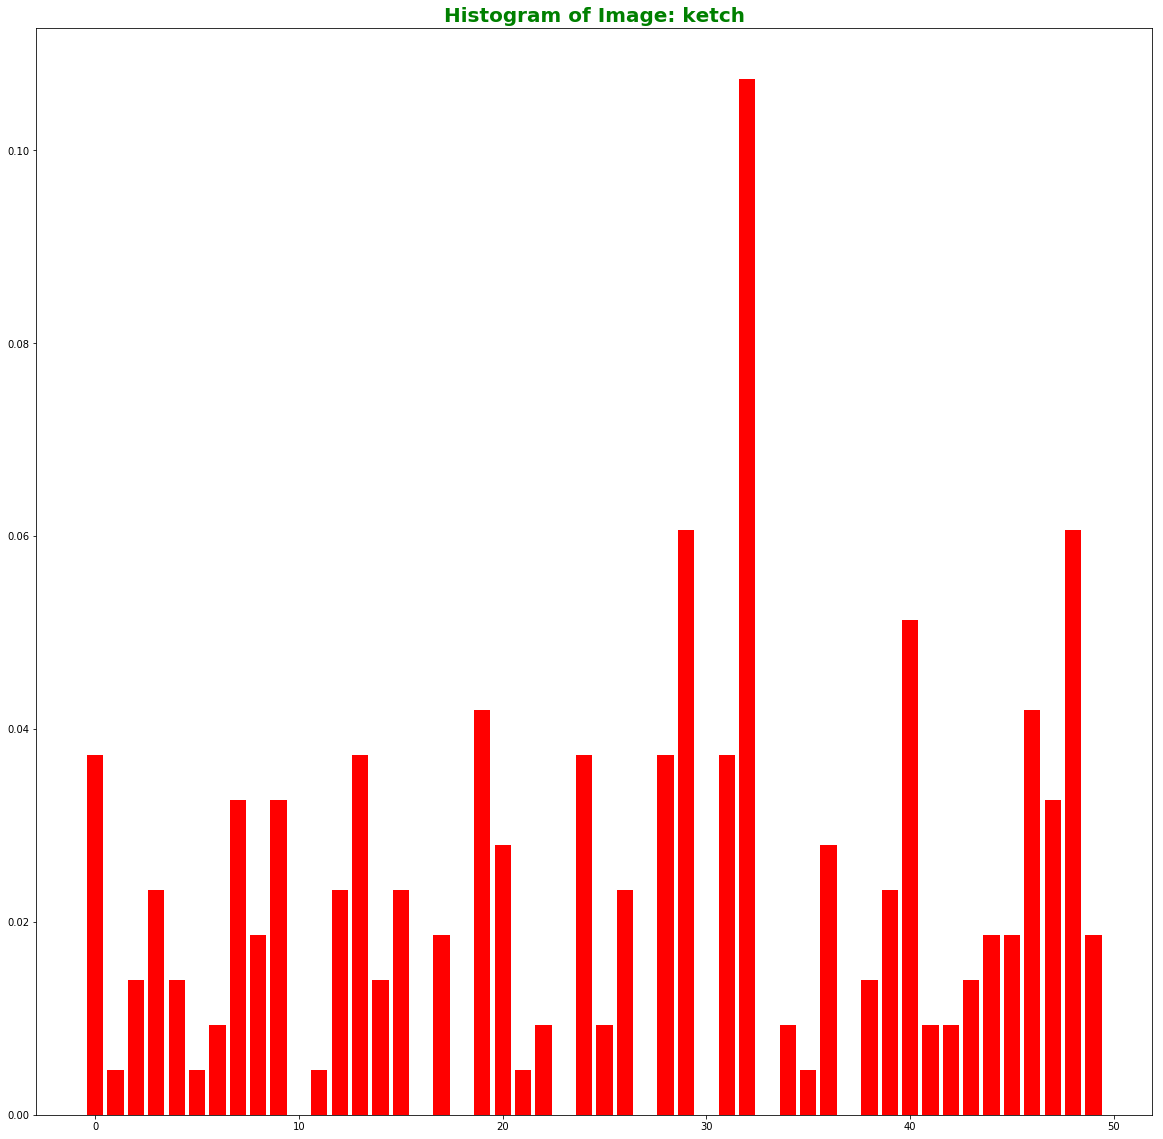

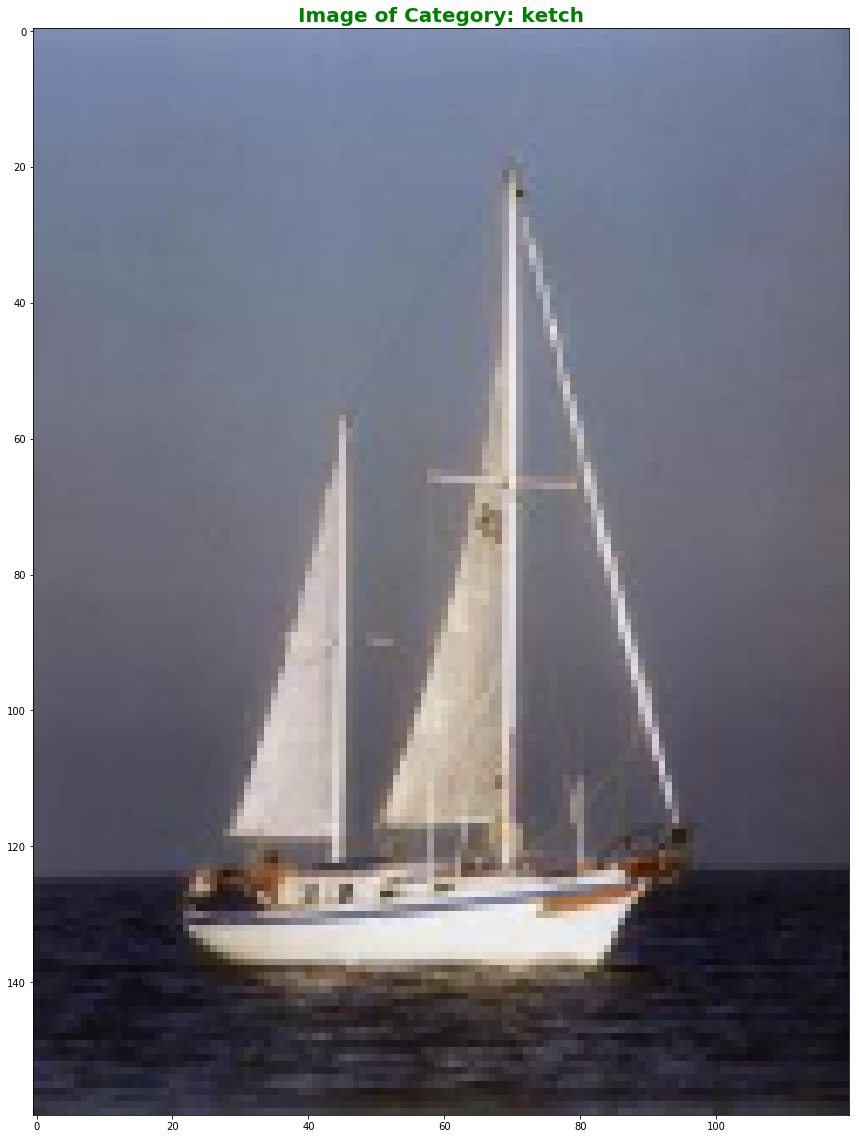

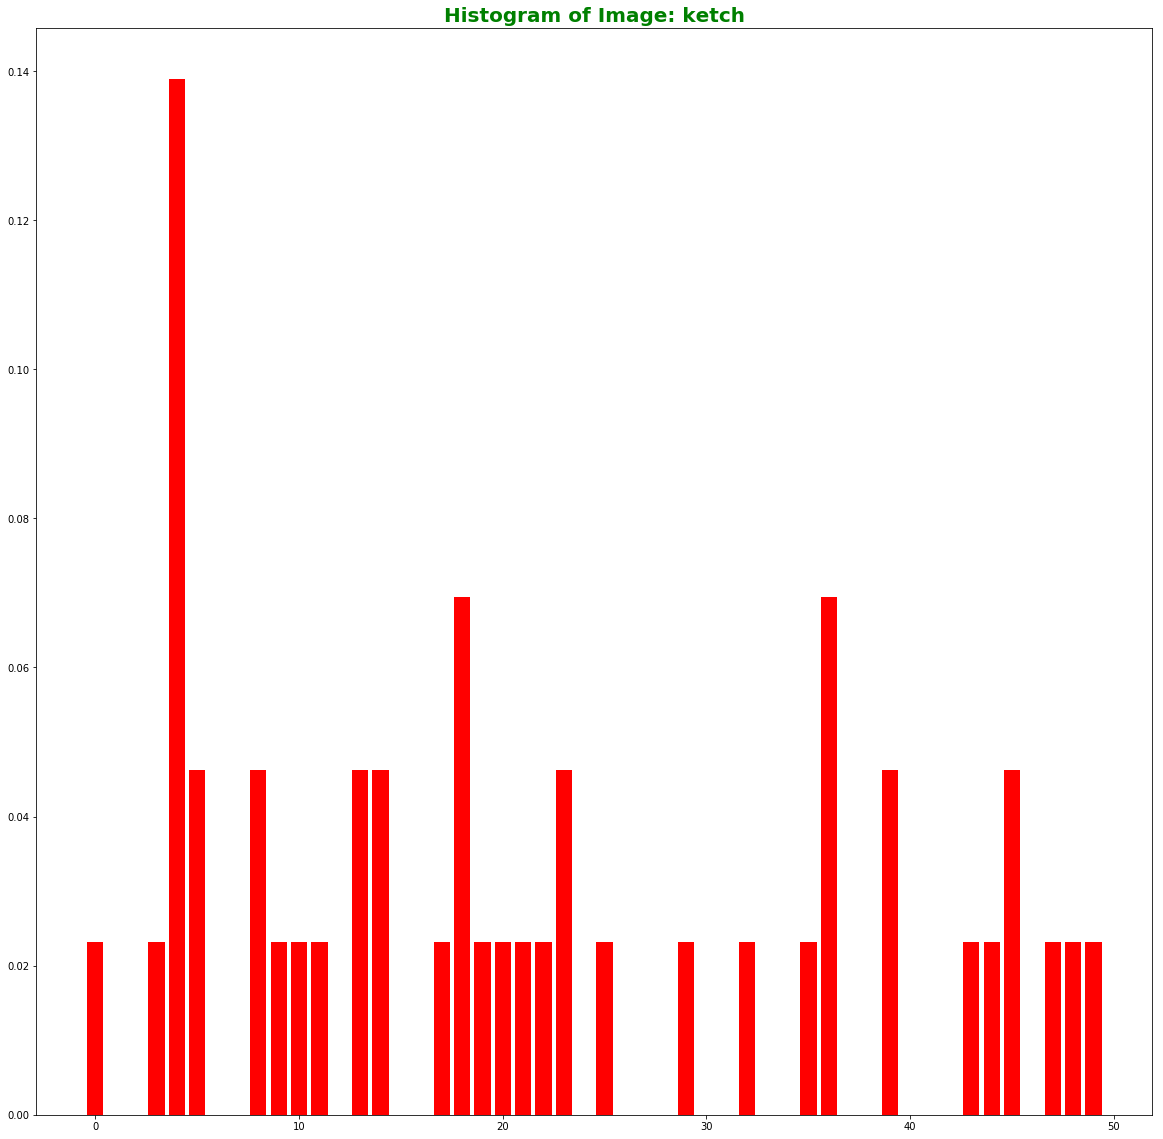

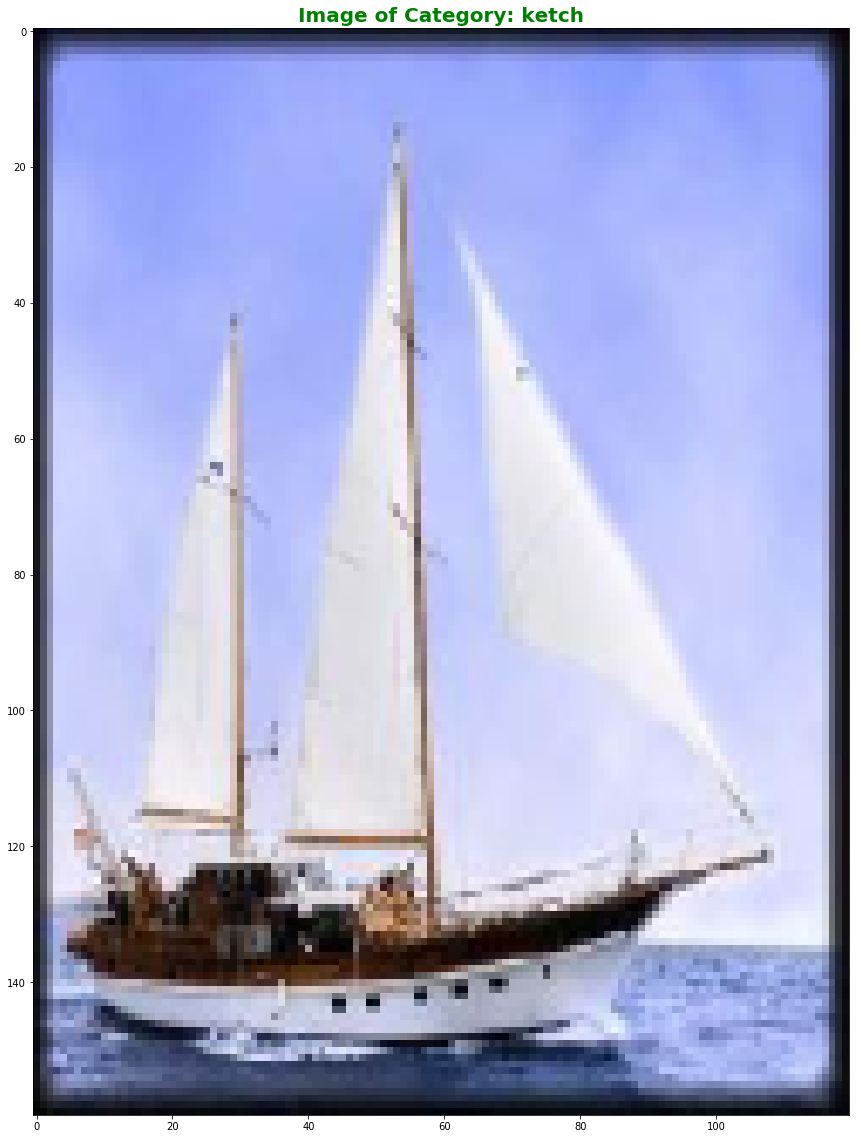

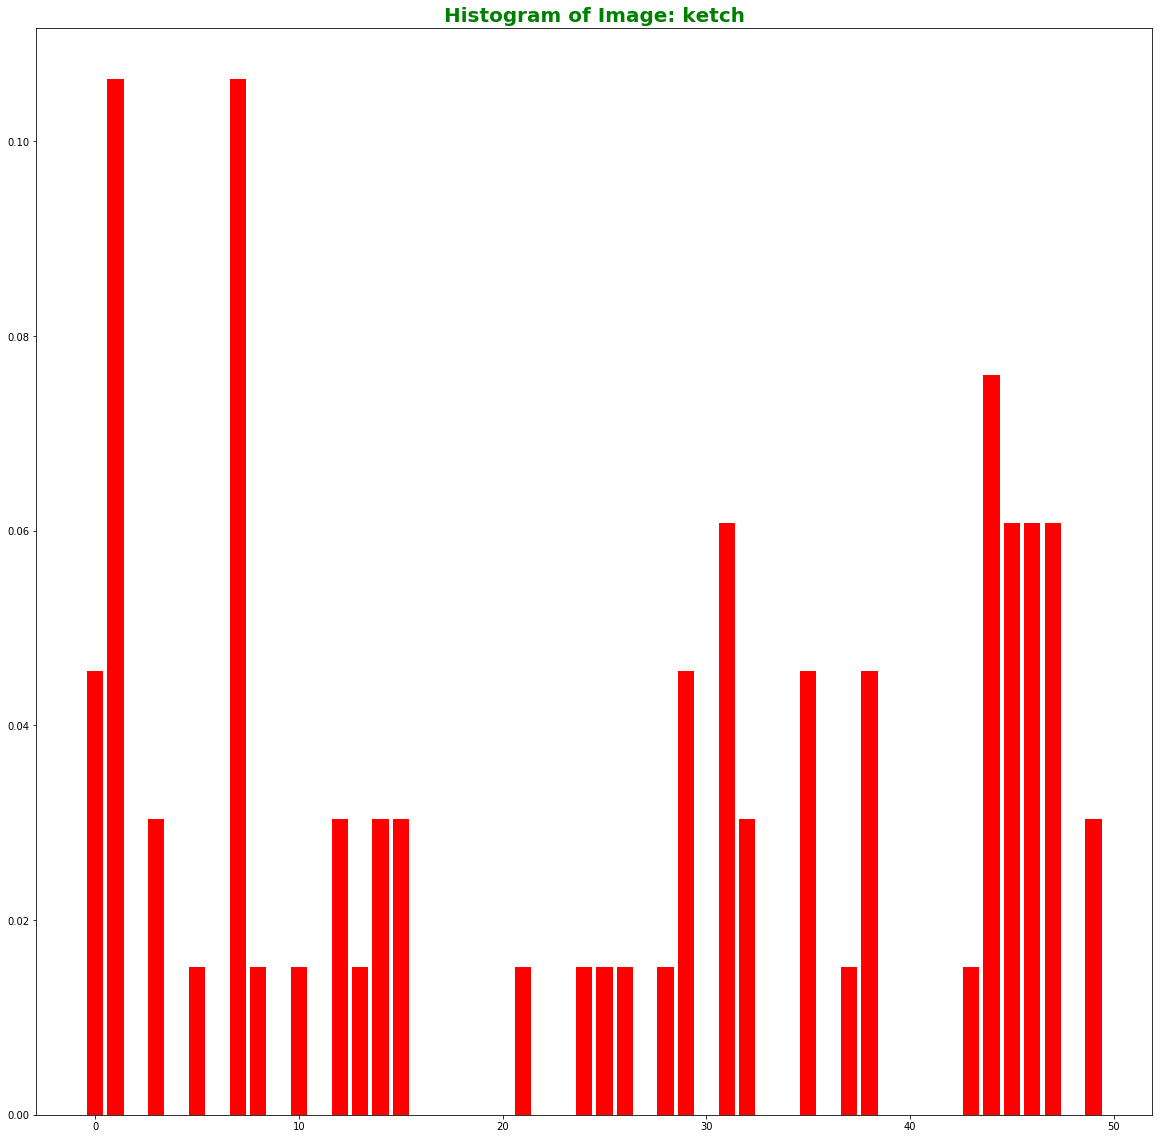

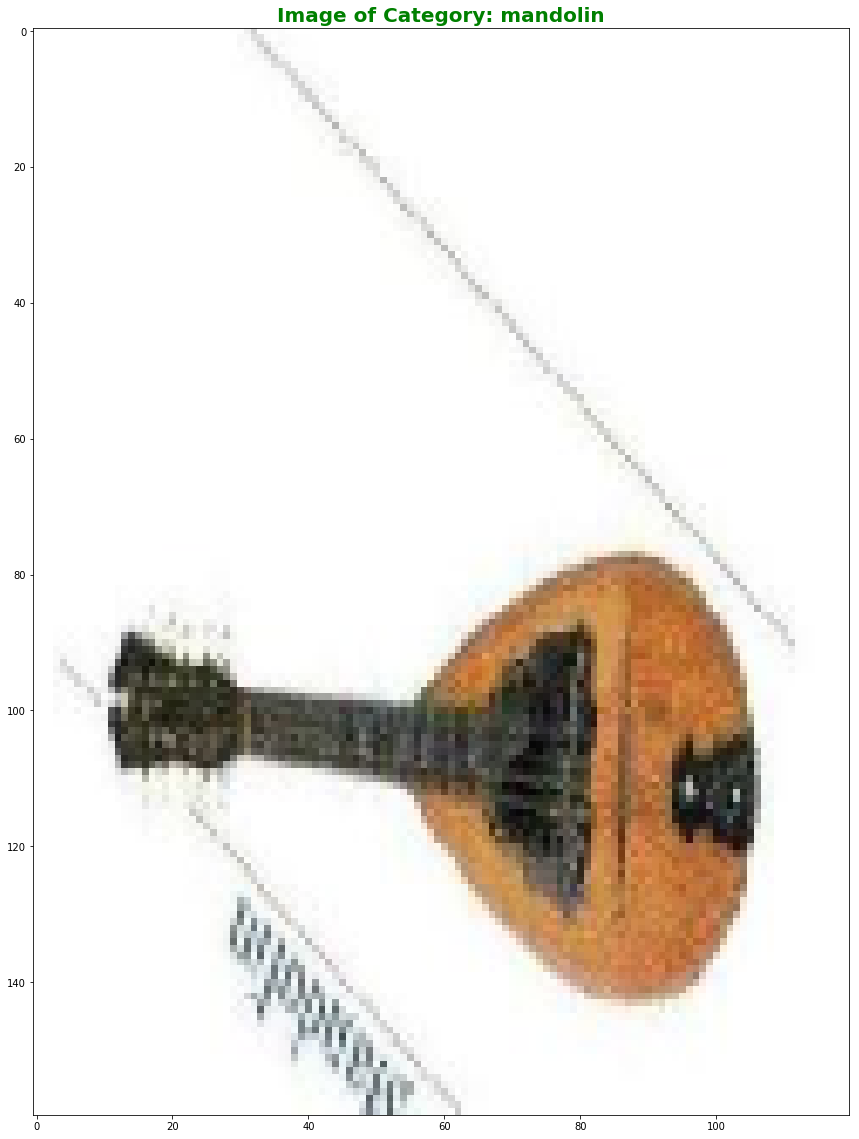

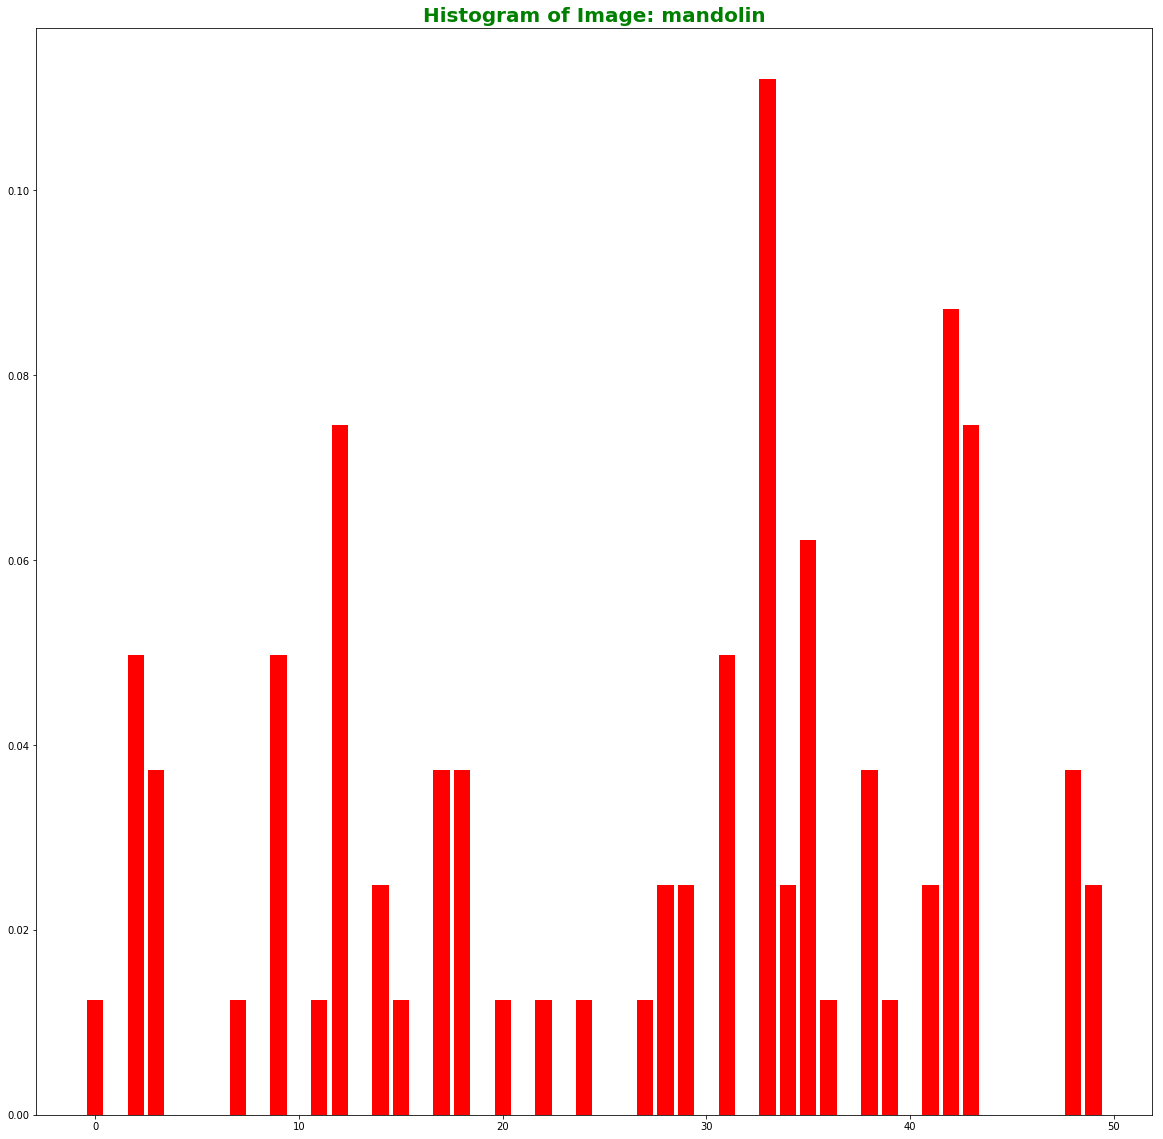

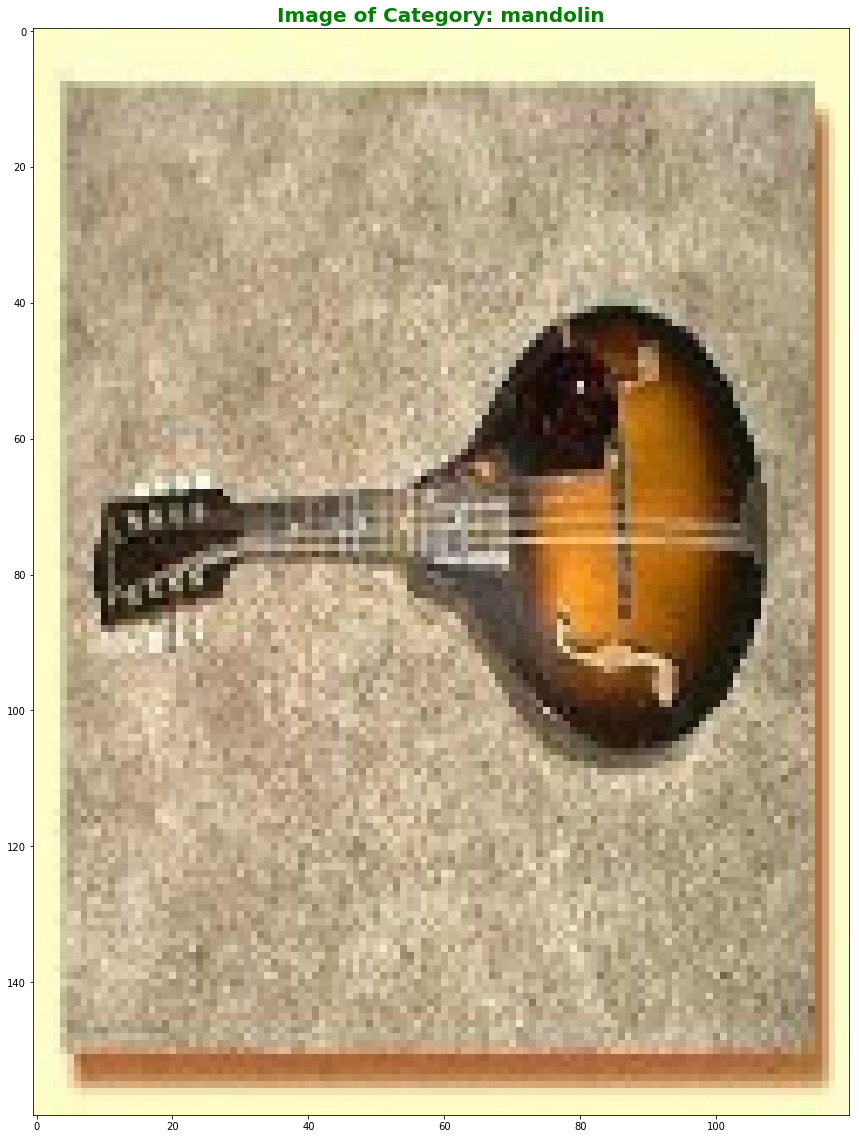

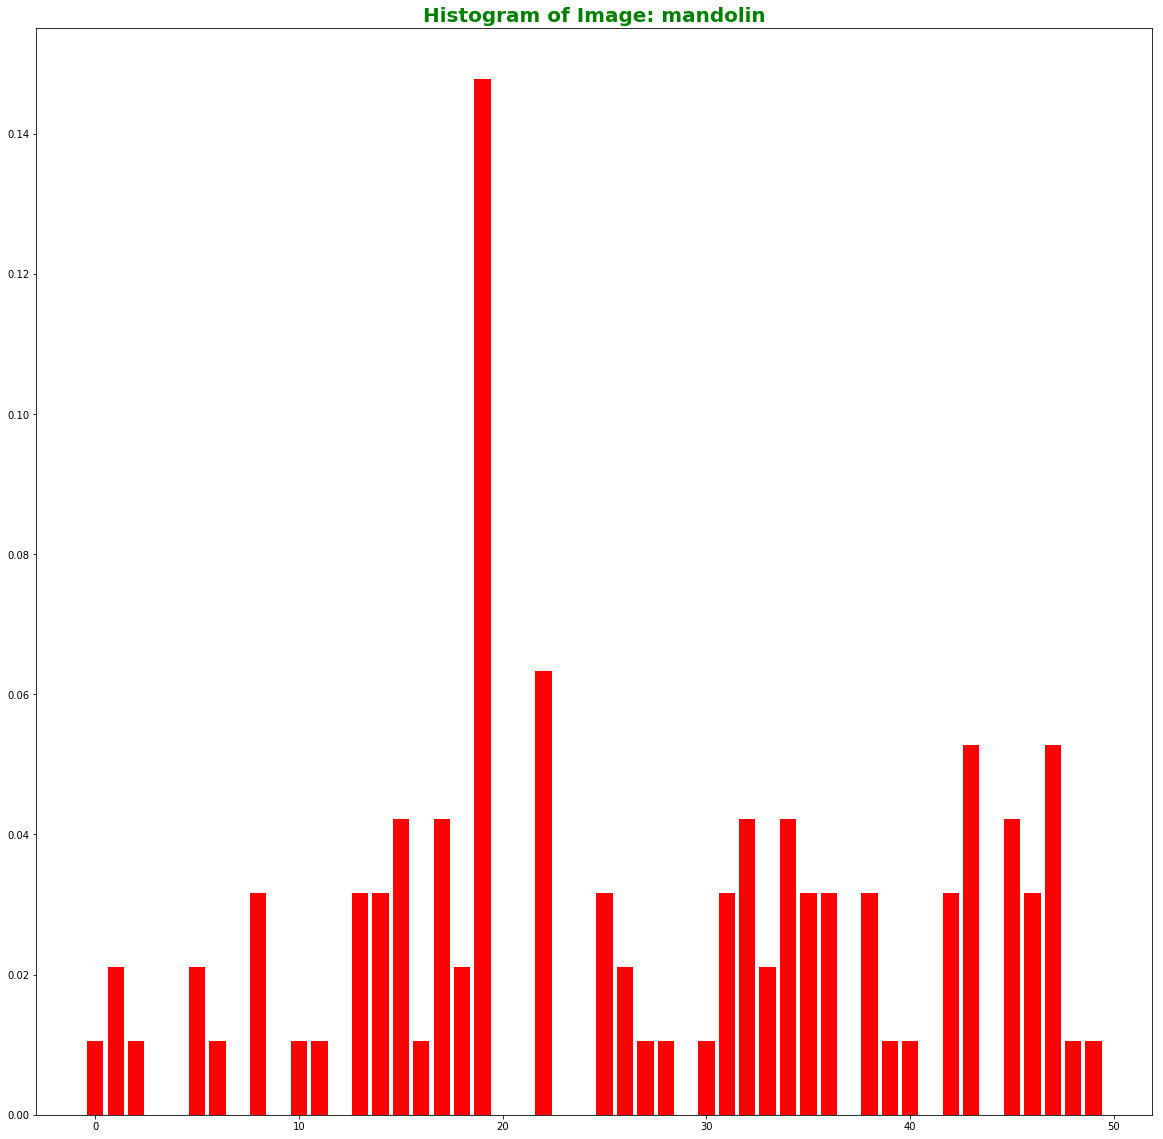

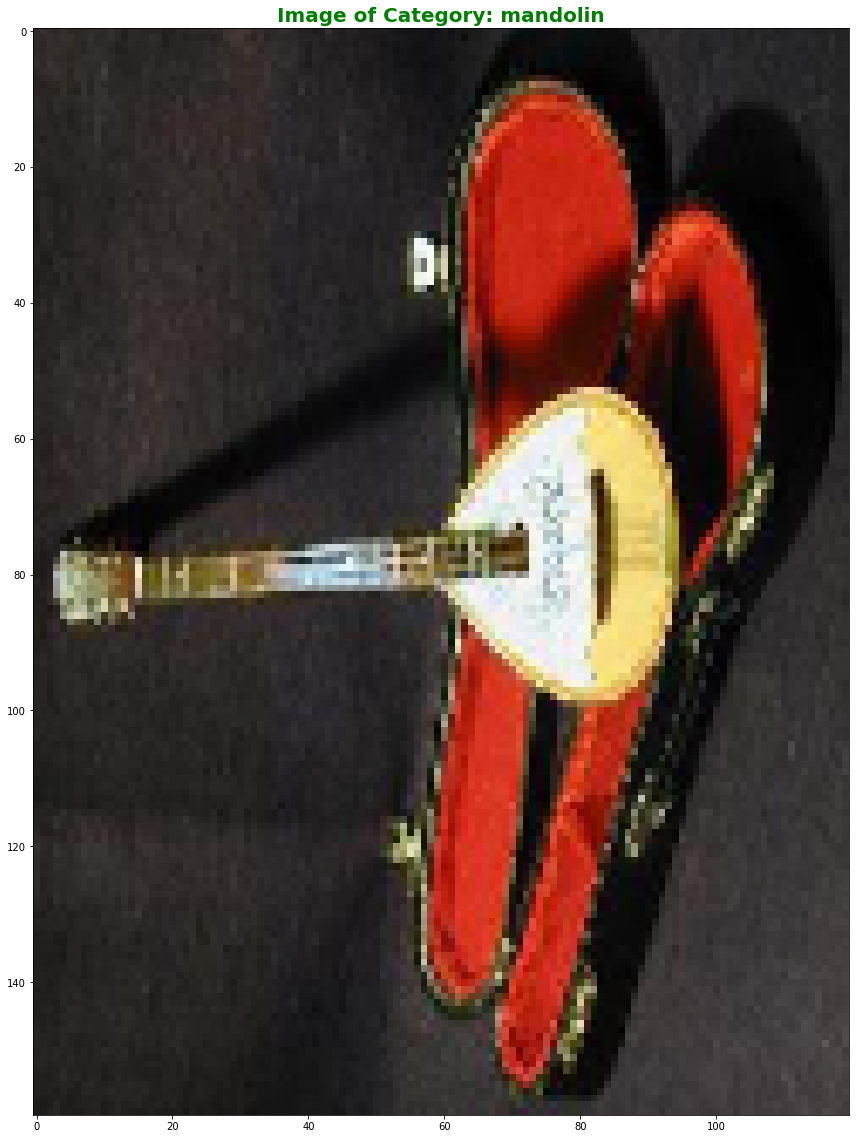

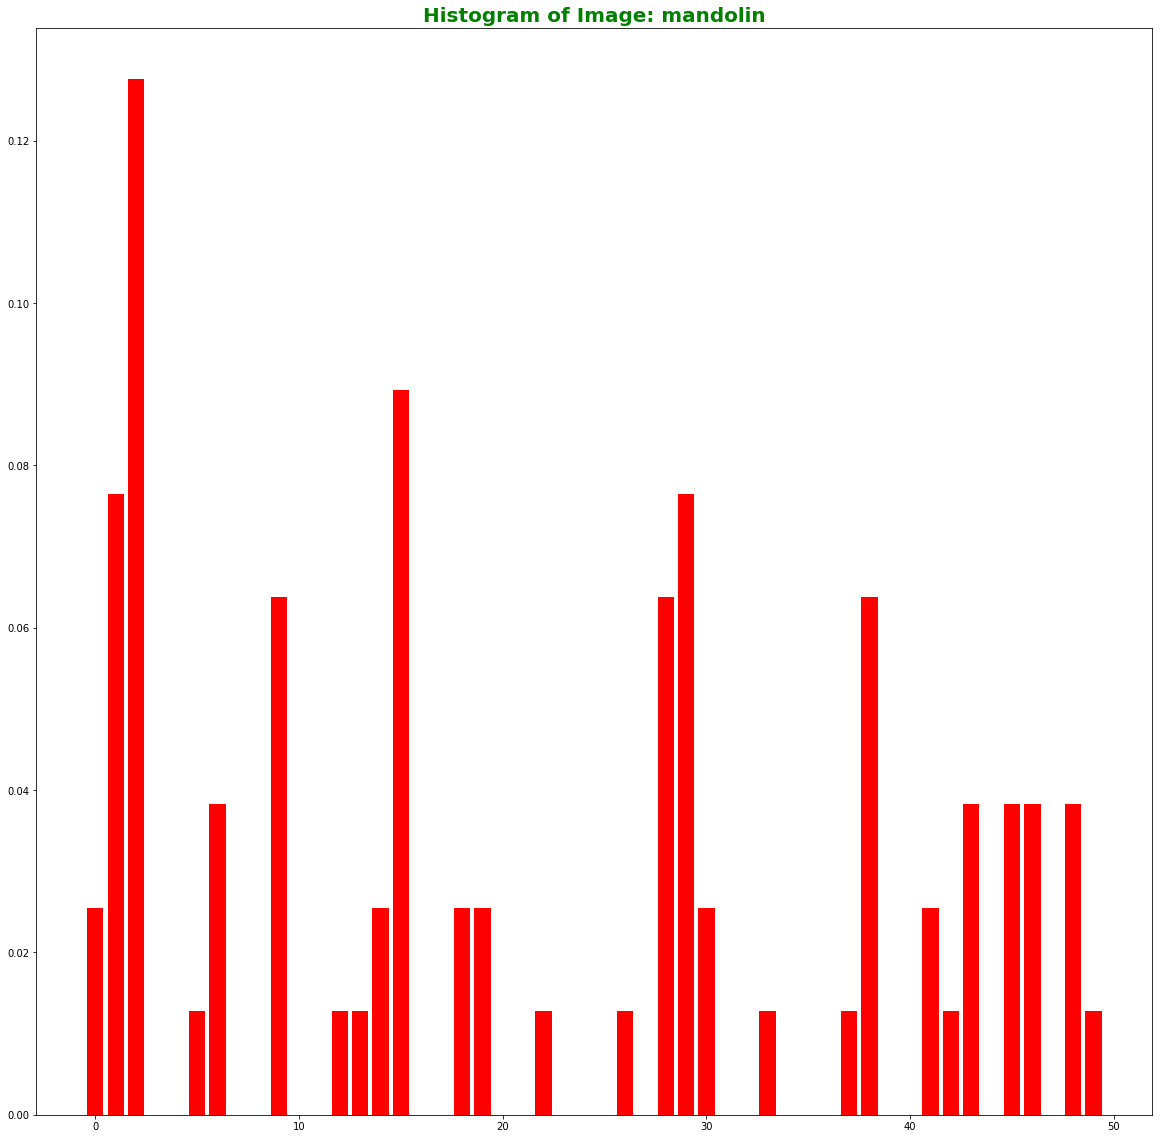

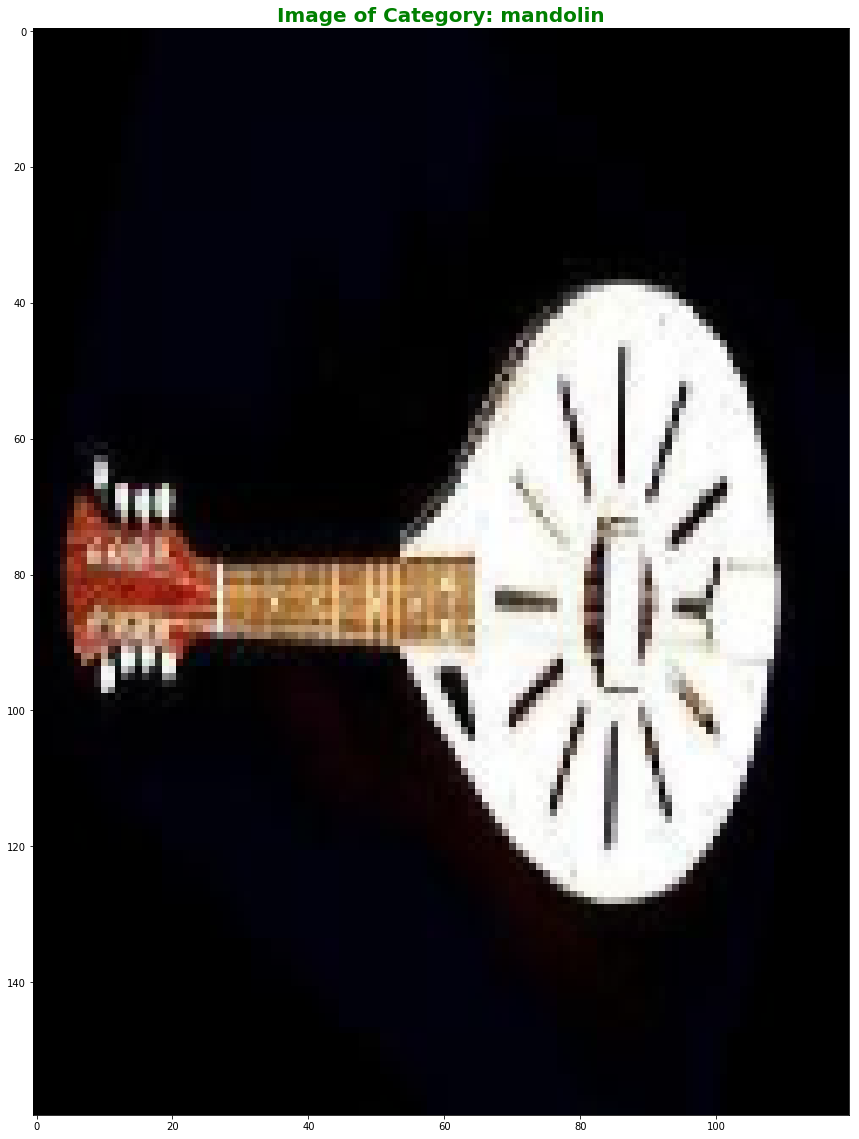

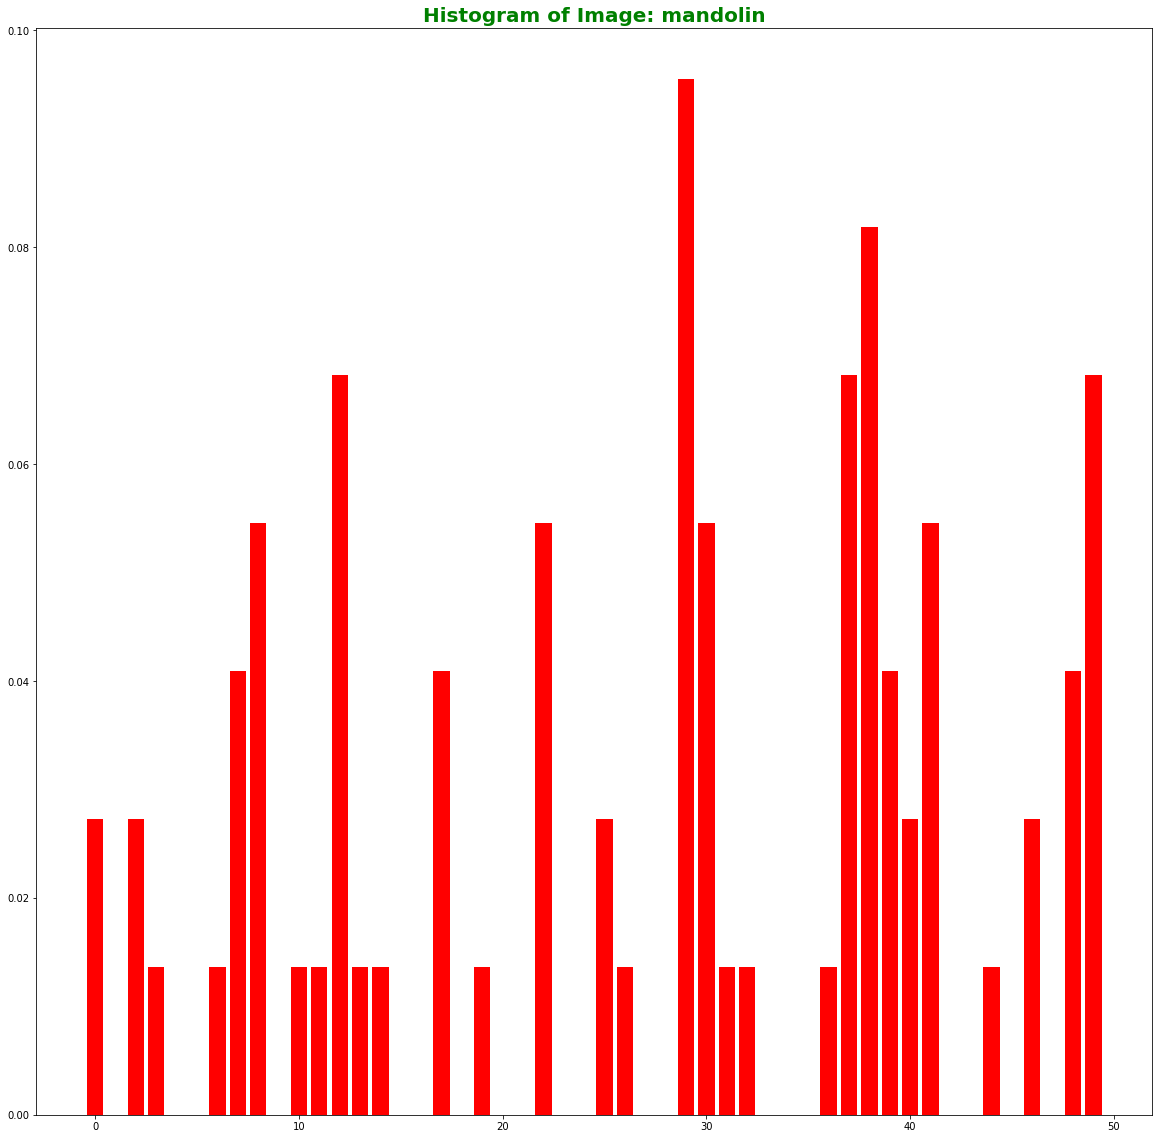

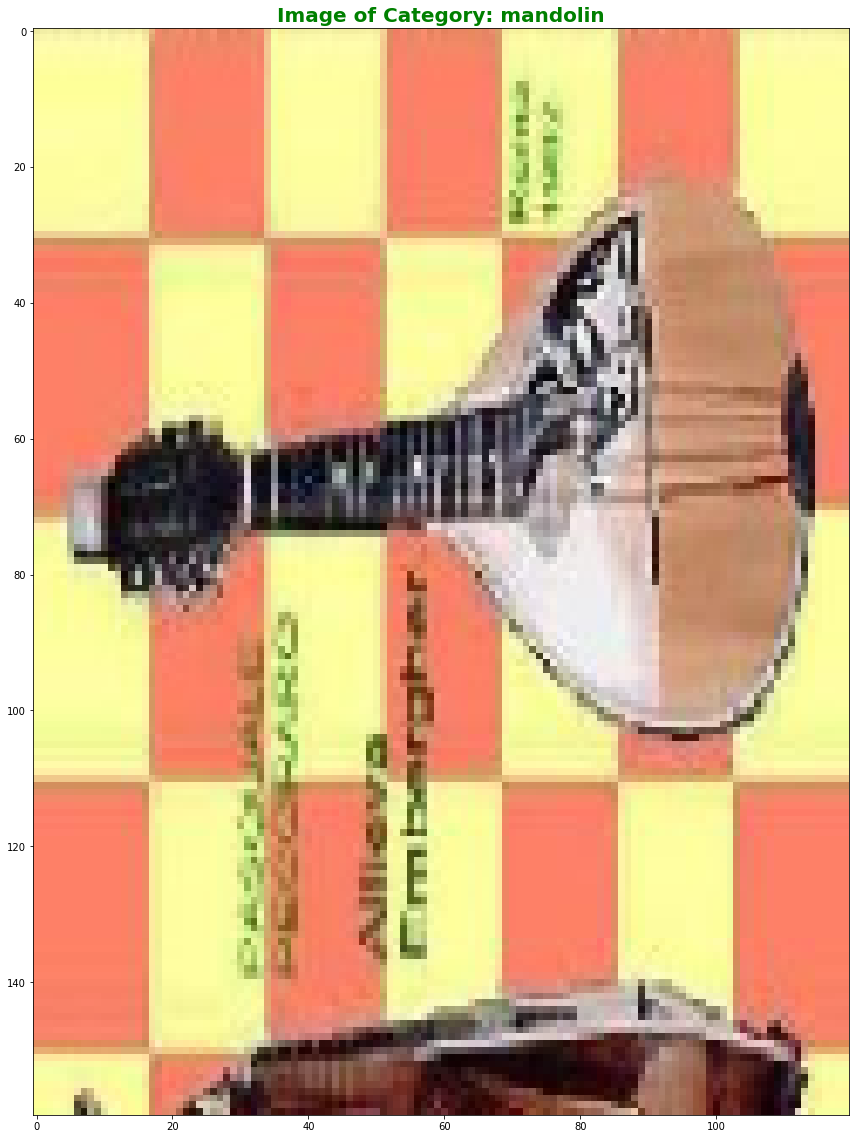

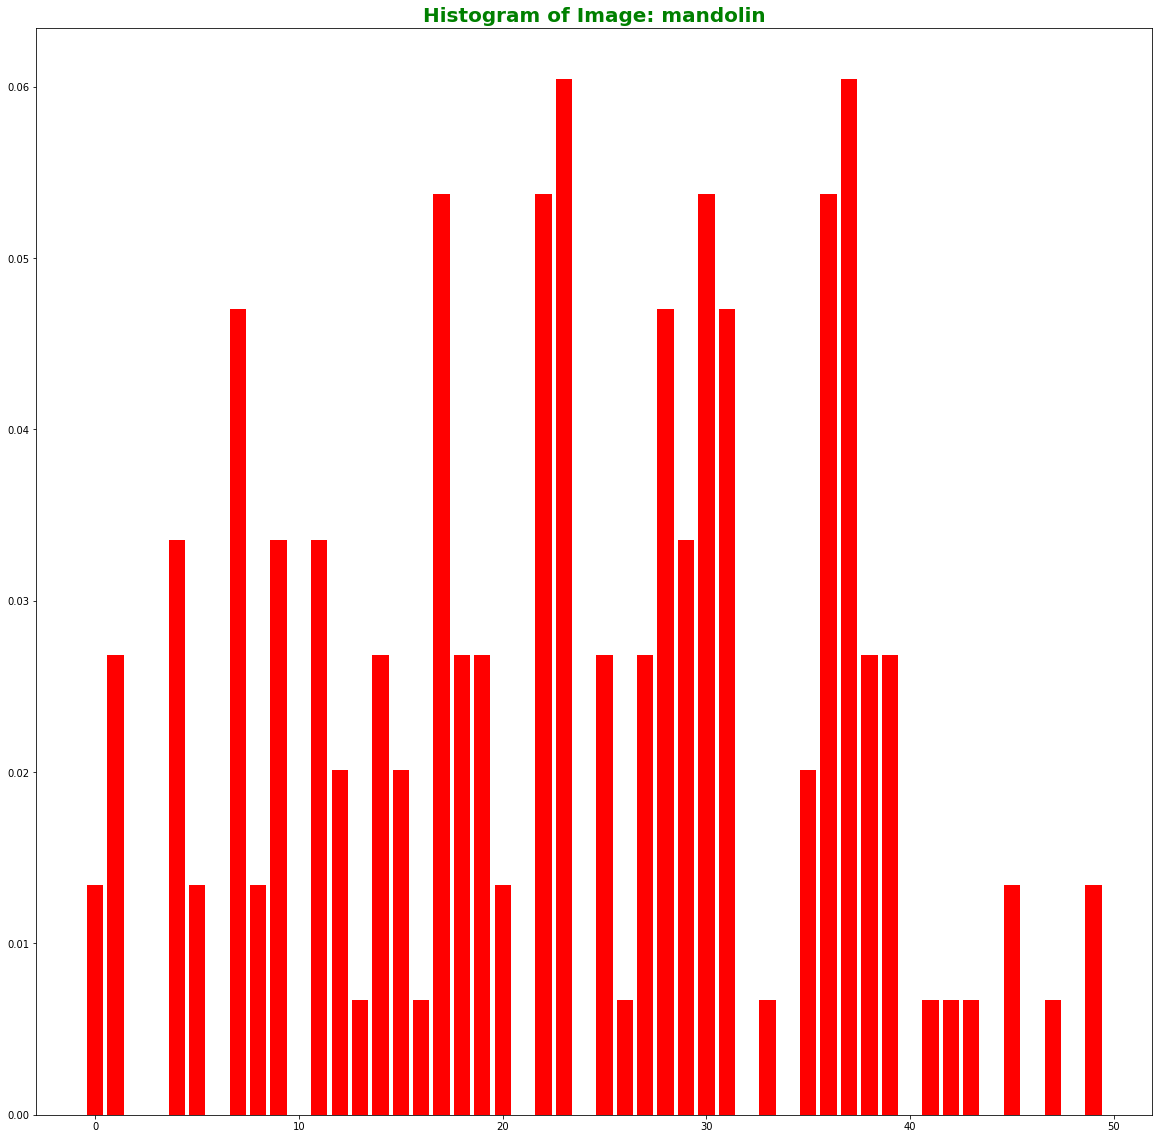

done


In [20]:
import cv2
from matplotlib import pyplot as plt
import os
from collections import defaultdict
import numpy as np
import itertools
from scipy.cluster.vq import vq,kmeans2
from random import shuffle



class bWords:
    DEBUG = True
    SKIPIMPORT = False  # Means to only import a minimal ammount of images
    IMAGES = defaultdict()
    outImages = []
    FONT_SIZE = 20

    def resizeImage(self, image, dbug=DEBUG):
        if dbug:
            image = cv2.resize(image, (120, 160))
        else:
            image = cv2.resize(image, (2400, 1200))
        return image

    def displayImage(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.title(img[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
        plt.imshow(img[0])

        plt.imshow(img)

    def displayImages(self, images):
        print("Displaying outs")
        for im in images:
            ima = im[0]
            ima = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.title(im[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
            plt.imshow(ima)

    def importImages(self, path):
        # for each category, we need to get all the pictures associated with it
        categories = [i[0] for i in os.walk(path)][1:]
        categories = categories[int(len(categories) / 2):]
        cs = [i.rsplit('/', 1)[1] for i in categories]

        # Create a dictionary where we have category as dict key, returning the array of related images
        for i in range(len(categories)):
            imNames = [j[2] for j in os.walk(categories[i] + "/")][0]
            if self.SKIPIMPORT and len(imNames):
                # No point importing ALL PICTURES when testing...
                if (i % 2 == 0 or i % 5 == 0):
                    continue
                imNames = imNames[:2]

            print ("\t importing: " + "(" + str(len(imNames)) + ") " + str(cs[i]) + ":"),
            importedImages = []
            for idx, image in enumerate(imNames):
                if (idx % 10 == 0):
                    print ('.'),
                # import each image and categorize it
                im = cv2.imread(categories[i] + "/" + image)
                # Resize each image for your sanity
                im = self.resizeImage(im)

                # Compute the sift features for each image
                s = cv2.xfeatures2d.SIFT_create()
                sifts = s.detectAndCompute(im, None)[1]

                #Then run k means on the imported images features
                try:
                    kmCentroids,kmClusters = kmeans2(sifts,50)
                except Exception:
                    continue
                #Then create a histogram based off of each cluster
                hist,bin_edges = np.histogram(kmClusters,50,normed=True)

                # #Normalize the histogram
                # hist = hist/50

                # Append imported images to list
                imageAndFeatures = dict({'image': im, 'hist': hist,'bin_edges':bin_edges})
                importedImages.append(imageAndFeatures)
            print ""
            self.IMAGES[cs[i]] = importedImages

    def main(self):
        pathToImages = "./images/101_ObjectCategories"

        print "Importing the images and run the kmeans algorithm"
        self.importImages(pathToImages)

        print "displaying images"
        # pick 2 random categories
        categories = [i for i in self.IMAGES]
        shuffle(categories)
        categories = categories[3:5]

        for i in categories:
            ims = self.IMAGES[i]
            ims = ims[:5]
            for image in ims:
                #first get the raw image and histogram data
                img,hist,bin_edges = image['image'],image['hist'],image['bin_edges']
                #plot the raw image
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure()
                plt.title("Image of Category: "+str(i), fontsize=self.FONT_SIZE, fontweight='bold', color="green")
                plt.imshow(img)

                #Then plot the histogram
                fig,ax = plt.subplots()
                ax.bar(range(50),hist,width=0.8,color='r')
                plt.title("Histogram of Image: " + str(i), fontsize=self.FONT_SIZE, fontweight='bold', color="green")
                plt.show()
                # plt.savefig("./images/histograms/temp.png")



        print "done"


%pylab
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20.0)
b = bWords()
b.main()


# Optical Flow

In [ ]:
import cv2
from matplotlib import pyplot as plt
from collections import defaultdict
import numpy as np
import math


class opticalFlow:
    DEBUG = True
    SKIPIMPORT = False  # Means to only import a minimal ammount of images
    IMAGES = defaultdict()
    outImages = []
    FONT_SIZE = 20
    WINDOW_SIZE = 45

    def resizeImage(self, image, dbug=DEBUG):
        if dbug:
            image = cv2.resize(image, (120, 160))
        else:
            image = cv2.resize(image, (2400, 1200))
        return image

    def displayImage(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.title(img[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
        plt.imshow(img[0])

        plt.imshow(img)

    def displayImages(self, images):
        print("Displaying outs")
        for im in images:
            ima = np.array(im[0], dtype=np.uint8)
            if len(list(ima.shape)) < 3:
                ima = cv2.cvtColor(ima, cv2.COLOR_GRAY2RGB)
            else:
                ima = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.title(im[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
            plt.imshow(ima)

    def opticalFlow(self, im1_x, im1_y, im_dt):
        """
        This is the second implementation of optical flow with variable window sizes
        :param im1_x:
        :param im1_y:
        :param im_dt:
        :return:
        """
        #First create the matrix of flow vectors that we want to compute
        #Assume that each pixel has no flow to start with
        shp = im1_x.shape
        FLOW = np.zeros((shp[0], shp[1], 2))

        #Then start doing the optical flow,
        #todo, use multithreading if time to speed this up...
        d = int(self.WINDOW_SIZE / 2)  # So we can dynamically have varying sizes of windows
        prog = shp[0] / 10  # So we can have a 10% progress bar as we compute the values
        print ("Optical Flow: "),
        for i in range(d, shp[0] - d):
            if i % prog == 0:
                print str(i/prog)+"0% ",
            for j in range(d, shp[0] - d):
                # First get all the values within the windows to build column vectors
                # If there is no change between two windows then carry on
                dt = im_dt[i - d:i + d + 1, j - d:j + d + 1].flatten()
                if (dt.sum() == 0):#Speedup #1
                    continue
                dx = im1_x[i - d:i + d + 1, j - d:j + d + 1].flatten()
                dy = im1_y[i - d:i + d + 1, j - d:j + d + 1].flatten()

                if (dx.sum() == 0 and dy.sum() == 0): #Speedup #2
                    continue

                # then construct the matrices of interest A and A.T
                A_trans = np.matrix([dx, dy])
                A = A_trans.T
                dt = np.matrix(dt).T

                # Find Atrans*A and Atrans*T
                M = np.matmul(A_trans, A)
                T = np.matmul(A_trans, dt)

                #Another speedup #3
                if np.all(T==0):
                    continue

                # Then find the eigenvals of M, check whether matrix is invertible or not
                eigenvals = np.array(np.linalg.eigvals(M))
                invertible = True
                for eig in eigenvals:
                    if math.fabs(eig)<.2:
                        invertible = False
                if not invertible:
                    continue

                #Then get the inverse of M
                M_inv = M.I
                #Multiply this inverse to T to get the u, v vectors we are interested in
                flow = np.array(np.matmul(M_inv,T))
                f1,f2 = flow[0][0],flow[1][0]
                FLOW[i][j][0] = f1
                FLOW[i][j][1] = f2
        return FLOW

    def placeVectorsOnImage(self, flow, image):

        # Then draw an arrow over the image for every... ten pixels?
        shp = flow.shape
        for i in range(1, shp[0], 10):
            for j in range(1, shp[1], 10):
                # Get the arrow vector
                u, v = flow[i][j][0], flow[i][j][1]

                # Draw the arrow vector
                u = int(u)
                v = int(v)

                #Some of the values that we get are odd... must be a float conversion problem
                if (u < 10 and v == 10):
                    continue

                #Small error?
                if(u > 254 or v > 254):
                    continue

                pt1 = (i, j)
                pt2 = (i + v, j + u)

                # if self.DEBUG:
                #     print "u: " + str(u) + " v: " + str(v) + " (" + str(i) + "," + str(j) + ")"

                image = cv2.arrowedLine(image, pt1, pt2, (0, 0, 255), 2)

        return image

    def main(self):
        # First upload both images, in grey and colour
        im1, im2 = cv2.imread("./images/flow_images/frame1.jpg", 0), cv2.imread("./images/flow_images/frame2.jpg", 0)
        im1_clr = cv2.imread("./images/flow_images/frame1.jpg")
        self.outImages.append((im1, "Frame 1"))
        self.outImages.append((im2, "Frame2"))
        self.outImages.append((im1_clr, "Frame1 Color"))

        # Then zero pad the images, given we are using windows
        padding = int(self.WINDOW_SIZE / 2)
        im1 = np.pad(im1, padding, "constant")
        im2 = np.pad(im2, padding, "constant")

        # Then find the X and Y derivatives of the image
        im1_x = cv2.Sobel(im1, cv2.CV_8U, 1, 0, ksize=5)
        im1_y = cv2.Sobel(im1, cv2.CV_8U, 0, 1, ksize=5)

        self.outImages.append((im1_x, "Sobel X of frame 1"))
        self.outImages.append((im1_y, "Sobel Y of frame 1"))

        # Also find the difference between the two frames It
        I_dt = np.subtract(im2, im1)

        # Then compute the optical flow
        flow = self.opticalFlow(im1_x, im1_y,I_dt)

        # Then overlay flow vectors on the original image
        vectoredImage = self.placeVectorsOnImage(flow, im1_clr.copy())
        self.outImages.append((vectoredImage, "Final Image"))

        self.displayImages(self.outImages)


%pylab
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20.0)
b = opticalFlow()
b.main()


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Optical Flow:  10%  20%  30%  40%  50%  60%  70%  80%  90%  Displaying outs
